# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
      
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
           
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yen bai
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | udachnyy
Processing Record 5 of Set 1 | yarmouth
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | orlik
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | phan rang
City not found. Skipping...
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 16 of Set 1 | krasnoselkup
Processing Record 17 of Set 1 | amahai
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | santa marta
Processing Record 20 of Set 1 | grindavik
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | carav

Processing Record 37 of Set 4 | havoysund
Processing Record 38 of Set 4 | zambezi
Processing Record 39 of Set 4 | bambanglipuro
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | avila
Processing Record 42 of Set 4 | talcahuano
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | agrestina
Processing Record 45 of Set 4 | tucuman
Processing Record 46 of Set 4 | kondagaon
Processing Record 47 of Set 4 | tanout
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | iqaluit
Processing Record 0 of Set 5 | vestmanna
Processing Record 1 of Set 5 | santa isabel
Processing Record 2 of Set 5 | samusu
City not found. Skipping...
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | clinton
Processing Record 5 of Set 5 | riyadh
Processing Record 6 of Set 5 | nishihara
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | ust-nera
Processing Recor

Processing Record 25 of Set 8 | uyar
Processing Record 26 of Set 8 | durango
Processing Record 27 of Set 8 | dongsheng
Processing Record 28 of Set 8 | rawson
Processing Record 29 of Set 8 | maragogi
Processing Record 30 of Set 8 | bima
Processing Record 31 of Set 8 | vao
Processing Record 32 of Set 8 | manta
Processing Record 33 of Set 8 | markova
Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | lai
Processing Record 36 of Set 8 | russell
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | port blair
Processing Record 40 of Set 8 | patrocinio
Processing Record 41 of Set 8 | yei
Processing Record 42 of Set 8 | vanderhoof
Processing Record 43 of Set 8 | helena
Processing Record 44 of Set 8 | aguimes
Processing Record 45 of Set 8 | saint simons
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | la palma
Processing Record 48 of Set 8 | saint charles
Processing Record 49 o

Processing Record 17 of Set 12 | maloy
Processing Record 18 of Set 12 | ossora
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | soe
Processing Record 21 of Set 12 | praya
Processing Record 22 of Set 12 | baldone
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | figeac
Processing Record 26 of Set 12 | la libertad
Processing Record 27 of Set 12 | domoni
Processing Record 28 of Set 12 | leningradskiy
Processing Record 29 of Set 12 | bellevue
Processing Record 30 of Set 12 | muroto
Processing Record 31 of Set 12 | urucara
Processing Record 32 of Set 12 | henderson
Processing Record 33 of Set 12 | marovoay
Processing Record 34 of Set 12 | tutoia
Processing Record 35 of Set 12 | novoyegoryevskoye
City not found. Skipping...
Processing Record 36 of Set 12 | butembo
Processing Record 37 of Set 12 | broome
Processing Record 38 of Set 12 | mendahara
City not found. Skipping...
Processing Record 39 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yen bai,21.7000,104.8667,73.90,87,35,2.48,VN,1668179755
1,kahului,20.8947,-156.4700,77.02,70,20,14.97,US,1668179755
2,atuona,-9.8000,-139.0333,76.91,82,30,14.41,PF,1668179755
3,udachnyy,66.4167,112.4000,-6.56,76,100,7.56,RU,1668179756
4,yarmouth,41.7057,-70.2286,67.64,86,75,6.91,US,1668179756


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yen bai,21.7000,104.8667,73.90,87,35,2.48,VN,1668179755
1,kahului,20.8947,-156.4700,77.02,70,20,14.97,US,1668179755
2,atuona,-9.8000,-139.0333,76.91,82,30,14.41,PF,1668179755
3,udachnyy,66.4167,112.4000,-6.56,76,100,7.56,RU,1668179756
4,yarmouth,41.7057,-70.2286,67.64,86,75,6.91,US,1668179756


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

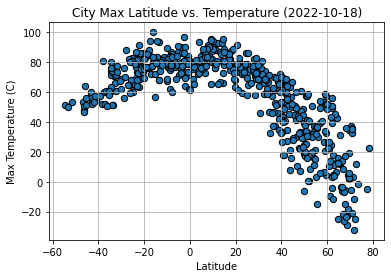

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_plot = city_data_df[["Max Temp","Lat"]]
city_weather_plot = city_data_plot.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, s=40, edgecolor='black')
plt.gca().update(dict(title='City Max Latitude vs. Temperature (2022-10-18)', xlabel="Latitude", ylabel='Max Temperature (C)'))

# Incorporate the other graph properties
plt.gca().update(dict(title='City Max Latitude vs. Temperature (2022-10-18)', xlabel="Latitude", ylabel='Max Temperature (C)'))

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

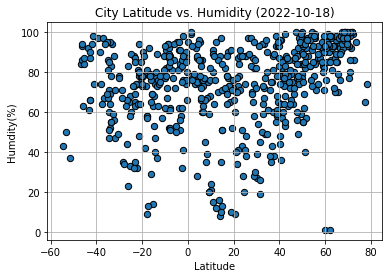

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_plot2 = city_data_df[["Humidity", "Lat"]]
city_weather2_plot = city_data_plot2.plot(kind='scatter', x='Lat', y='Humidity', grid=True, s=40,edgecolor='black')
# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Humidity (2022-10-18)', xlabel='Latitude', ylabel='Humdity(%)'))
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

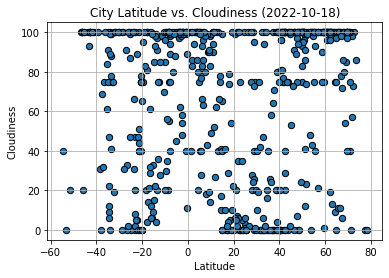

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_plot3 = city_data_df[["Cloudiness","Lat"]]
city_weather3_plot = city_data_plot3.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, s=40, edgecolor='black')

# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Cloudiness (2022-10-18)', xlabel='Latitude', ylabel='Cloudiness'))

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

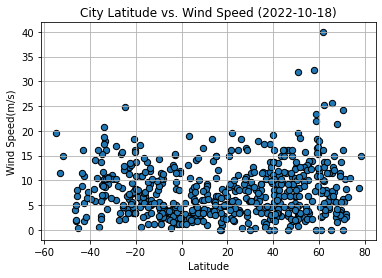

In [25]:
# Build the scatter plots for latitude vs. wind speed
city_data_plot4 = city_data_df[['Wind Speed','Lat']]
city_weather4_plot = city_data_plot4.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, s=40, edgecolor='black')

# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Wind Speed (2022-10-18)', xlabel="Latitude", ylabel="Wind Speed(m/s)"))

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yen bai,21.7000,104.8667,73.90,87,35,2.48,VN,1668179755
1,kahului,20.8947,-156.4700,77.02,70,20,14.97,US,1668179755
3,udachnyy,66.4167,112.4000,-6.56,76,100,7.56,RU,1668179756
4,yarmouth,41.7057,-70.2286,67.64,86,75,6.91,US,1668179756
5,kapaa,22.0752,-159.3190,75.18,73,100,19.57,US,1668179756


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,76.91,82,30,14.41,PF,1668179755
8,ushuaia,-54.8000,-68.3000,51.46,43,40,19.57,AR,1668179619
9,bluff,-46.6000,168.3333,53.22,84,100,4.12,NZ,1668179757
12,hermanus,-34.4187,19.2345,73.80,71,22,6.62,ZA,1668179758
14,amahai,-3.3333,128.9167,80.37,82,62,1.45,ID,1668179758


###  Temperature vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Max Temp is 0.72'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Max Temperature (F)')]

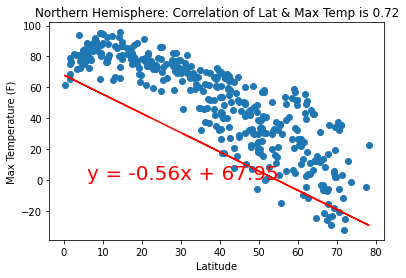

In [33]:
# Linear regression on Northern Hemisphere
(slope_n, intercept_n, rvalue, pvalue, stderr) = linregress(x_values_n, y_values_n)

x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df["Max Temp"]
regress_values_n = x_values_n * slope_n + intercept



x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df["Max Temp"]
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values_n, y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")
plt.annotate(line_eq_n,(5.8,0.8),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Max Temp is {rvalue**2:.2f}',xlabel='Latitude', ylabel='Max Temperature (F)'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Max Temp is 0.43'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Max Temperature (F)')]

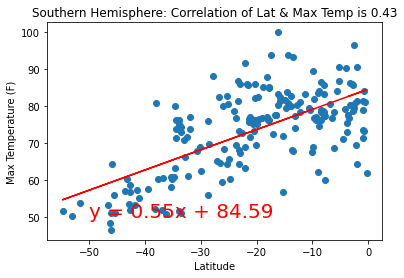

In [35]:
# Linear regression on Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df["Max Temp"]

(slope_s, intercept_s, rvalue, pvalue, stderr) = linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope_s + intercept_s


line_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))

plt.scatter(x_values_s, y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")
plt.annotate(line_eq_s,(-50,50),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Max Temp is {rvalue**2:.2f}', xlabel='Latitude', ylabel='Max Temperature (F)'))


In the northern hemisphere, maximum tempature and latitude are negatively correlated.  That means the higher the latitude, the lower the maximum temperatue.  The Pearson correlation coefficient is strong at 73%.

In the southern hemisphere, maximum temperature and latitude are positively correlated.  That means the higher the maximum temperature, the higher the latitude.  The Pearson correlation coefficient is weak at 50% meaning that there is low correlation.

### Humidity vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Humidity is 0.15'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Humidity')]

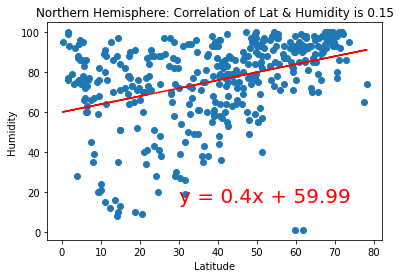

In [38]:
# Northern Hemisphere
(slope_nH, intercept_nH, rvalue_nH, pvalue_nH, stderr_nH) = linregress(x_values_nH, y_values_nH)
x_values_nH = northern_hemi_df['Lat']
y_values_nH = northern_hemi_df["Humidity"]
line_eq_nH = "y = " + str(round(slope_nH,2)) + "x + " + str(round(intercept_nH,2))

(slope_nH, intercept_nH, rvalue_nH, pvalue_nH, stderr_nH) = linregress(x_values_nH, y_values_nH)
regress_values_nH = x_values_nH * slope_nH + intercept_nH

plt.scatter(x_values_nH, y_values_nH)
plt.plot(x_values_nH,regress_values_nH,"r-")
plt.annotate(line_eq_nH,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Humidity is {rvalue_nH**2:.2f}',xlabel='Latitude', ylabel='Humidity'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Humidity is 0.0017'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Humidity')]

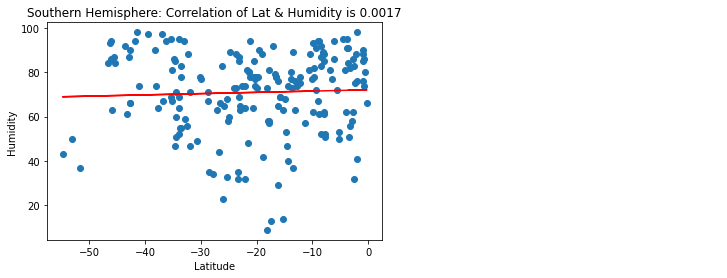

In [41]:
# Southern Hemisphere
x_values_sH = southern_hemi_df['Lat']
y_values_sH = southern_hemi_df["Humidity"]
(slope_sH, intercept_sH, rvalue_sH, pvalue_sH, stderr_sH) = linregress(x_values_sH, y_values_sH)


regress_values_sH = x_values_sH * slope_sH + intercept_sH
line_eq_sH = "y = " + str(round(slope_sH,2)) + "x + " + str(round(intercept_sH,2))



plt.scatter(x_values_sH, y_values_sH)
plt.plot(x_values_sH,regress_values_sH,"r-")
plt.annotate(line_eq_sH,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Humidity is {rvalue_sH**2:.4f}',xlabel='Latitude', ylabel='Humidity'))


In the northern hemisphere, humidity and latitude are positively correlated.  The Pearson correlation coefficient is weak. 

In the southern hemisphere, humidity and latitude have no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Cloudiness is 0.05'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Cloudiness')]

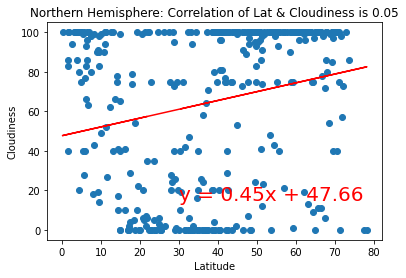

In [43]:
# Northern Hemisphere

x_values_nC = northern_hemi_df['Lat']
y_values_nC = northern_hemi_df["Cloudiness"]
(slope_nC, intercept_nC, rvalue_nC, pvalue_nC, stderr_nC) = linregress(x_values_nC, y_values_nC)
regress_values_nC = x_values_nC * slope_nC + intercept_nC


line_eq_nC = "y = " + str(round(slope_nC,2)) + "x + " + str(round(intercept_nC,2))


plt.scatter(x_values_nC, y_values_nC)
plt.plot(x_values_nC,regress_values_nC,"r-")
plt.annotate(line_eq_nC,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Cloudiness is {rvalue_nC**2:.2f}',xlabel='Latitude', ylabel='Cloudiness'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Cloudiness is 0.01'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Cloudiness')]

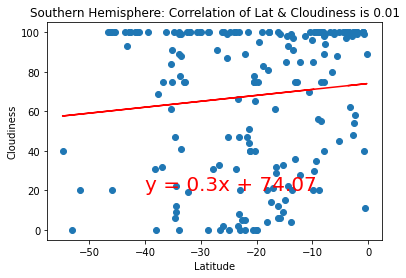

In [44]:
# Southern Hemisphere

x_values_sC = southern_hemi_df['Lat']
y_values_sC = southern_hemi_df["Cloudiness"]

(slope_sC, intercept_sC, rvalue_sC, pvalue_sC, stderr_sC) = linregress(x_values_sC, y_values_sC)
regress_values_sC = x_values_sC * slope_sC + intercept_sC

line_eq_sC = "y = " + str(round(slope_sC,2)) + "x + " + str(round(intercept_sC,2))


plt.scatter(x_values_sC, y_values_sC)
plt.plot(x_values_sC,regress_values_sC,"r-")
plt.annotate(line_eq_sC,(-40,20),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Cloudiness is {rvalue_sC**2:.2f}',xlabel='Latitude', ylabel='Cloudiness'))

In the northern hemisphere, cloudiness and latitude are positively correlated.  The Pearson correlation coefficient is weak (low). 

In the southern hemisphere, cloudiness and latitude is also positively correlated. The Pearson correlation coefficient is weak (low). 

### Wind Speed vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Wind Speed is 0.05'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Wind Speed')]

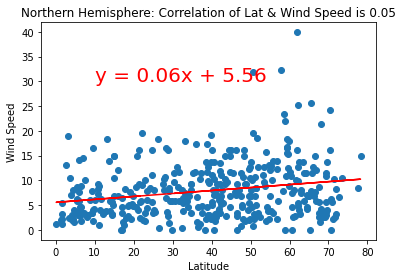

In [45]:
# Northern Hemisphere
x_values_nW = northern_hemi_df['Lat']
y_values_nW = northern_hemi_df["Wind Speed"]

(slope_nW, intercept_nW, rvalue_nW, pvalue_nW, stderr_nW) = linregress(x_values_nW, y_values_nW)
regress_values_nW = x_values_nW * slope_nW + intercept_nW

line_eq_nW = "y = " + str(round(slope_nW,2)) + "x + " + str(round(intercept_nW,2))



plt.scatter(x_values_nW, y_values_nW)
plt.plot(x_values_nW,regress_values_nW,"r-")
plt.annotate(line_eq_nW,(10,30),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Wind Speed is {rvalue_nW**2:.2f}',xlabel='Latitude', ylabel='Wind Speed'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Wind Speed is 0.06'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Wind Speed')]

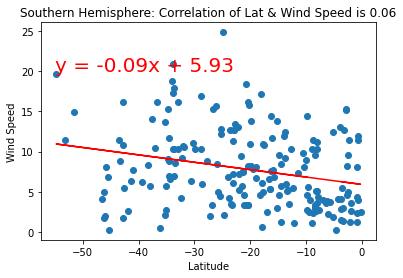

In [46]:
# Southern Hemisphere
x_values_sW = southern_hemi_df['Lat']
y_values_sW = southern_hemi_df["Wind Speed"]

(slope_sW, intercept_sW, rvalue_sW, pvalue_sW, stderr_sW) = linregress(x_values_sW, y_values_sW)
regress_values_sW = x_values_sW * slope_sW + intercept_sW

line_eq_sW = "y = " + str(round(slope_sW,2)) + "x + " + str(round(intercept_sW,2))



plt.scatter(x_values_sW, y_values_sW)
plt.plot(x_values_sW,regress_values_sW,"r-")
plt.annotate(line_eq_sW,(-55,20),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Wind Speed is {rvalue_sW**2:.2f}',xlabel='Latitude', ylabel='Wind Speed'))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the northern hemisphere, cloudiness and wind speed are slightly, positively correlated.  The Pearson correlation coefficient is weak (low). 

In the southern hemisphere, cloudiness and latitude is also slightly, negatively correlated. The Pearson correlation coefficient is weak (low).